In [45]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=10,6

In [46]:
import os
os.chdir("/Users/khwaabthareja/Desktop/projects/Time Series Analysis")
dataset=pd.read_csv("AirPassengers.csv")
dataset["Month"]=pd.to_datetime(dataset["Month"],infer_datetime_format=True)
indexedDataset=dataset.set_index(["Month"])

In [47]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [48]:
dataset.head(5)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


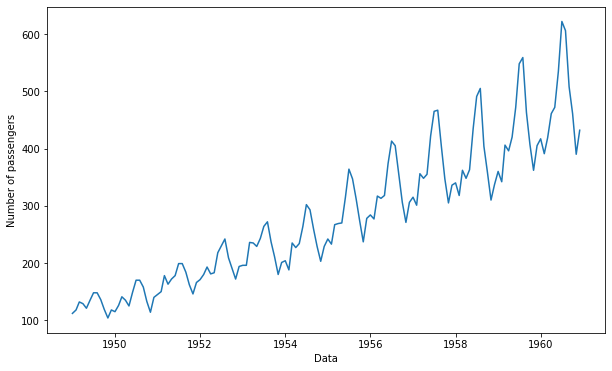

In [20]:
plt.xlabel("Data")
plt.ylabel("Number of passengers")
plt.plot(indexedDataset)

### Determining rolling statistics

In [49]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)


            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


In [50]:
print(rolstd.head(15))

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    13.720147
1950-01-01    13.453342
1950-02-01    13.166475
1950-03-01    13.686977


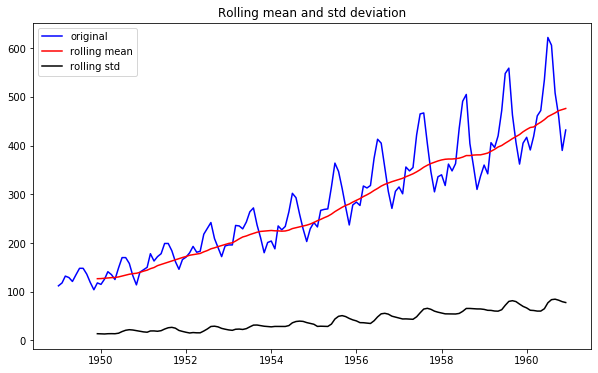

In [51]:
orig=plt.plot(indexedDataset,color="blue",label="original")
mean=plt.plot(rolmean,color="red",label="rolling mean")
std=plt.plot(rolstd,color="black",label="rolling std")
plt.legend(loc="best")
plt.title("Rolling mean and std deviation")
plt.show(block=False)

###### since in the above graph, the mean and std lines are not constant , hence we can conclude that the data here is not stationary 

## now performing dicky fuller test

In [52]:
from statsmodels.tsa.stattools import adfuller

print("Results of Dicky-Fuller test:")
dftest=adfuller(indexedDataset["#Passengers"],autolag="AIC") #Aic: a chi k information criterian 
#AIC gives you the information about what you wanted in time series 

dfoutput=pd.Series(dftest[0:4],index=["Test statistic","p-value","#Lags Used","Number of observation Used"])
for key,value in dftest[4].items():
    dfoutput["Critical value (%s)" %key]= value
print(dfoutput)

Results of Dicky-Fuller test:
Test statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of observation Used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


#### As per the null hypothesis, which is T.S is Non stationary
#### so to deny the null hypothesis, it says that the p value must be always less, maybe less than 0.5, but here in this case it is around 0.9. Also the critical value must be more than the test statistics, so we cannot rule out the null hypothesis, and hence, we have the dataset values as non stationary

In [53]:
dftest=adfuller(indexedDataset["#Passengers"],autolag="AIC")
dftest

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

# estimating trend



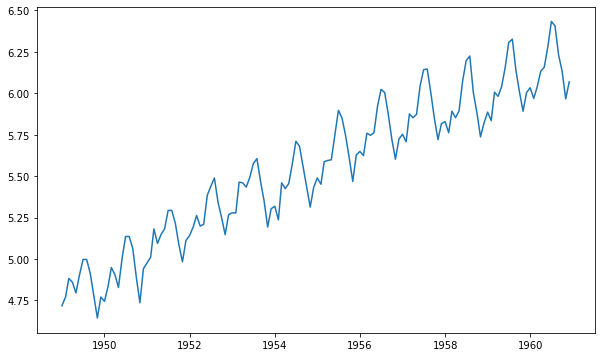

In [54]:
indexedDataset_logscale=np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

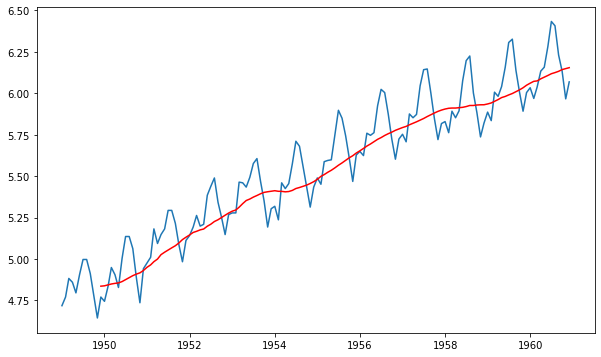

In [55]:
movingAverage=indexedDataset_logscale.rolling(window=12).mean()
movingstd=indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage,color="red")

### mean is still not stationary however better than the previous one

### took log scale so as to make the dataset values stationary, for the calculation of timeseries, however data is not stationary again

# Next we will find the difference between the moving avg and actual number of passengers

### We are doing all this to make the time series stationary

In [63]:
datasetLogScaleMinusMovingAverage=indexedDataset_logscale-movingAverage

#Removing NUll values

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)


,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [60]:
indexedDataset_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [69]:
#again doing tests to check whether now it is stationary or not
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingstd=timeseries.rolling(window=12).std()
    
    orig=plt.plot(timeseries,label="original")
    rolmean=plt.plot(movingAverage,color="red",label="rolling mean")
    rolstd=plt.plot(movingstd,color="black",label="rolling std")
    plt.legend(loc="best")
    plt.title("rolling mean and std")
    plt.show(block=False)
    
    
    #performing dicky-fuller test
    dftest=adfuller(timeseries["#Passengers"],autolag="AIC")
    dfoutput=pd.Series(dftest[0:4],index=["Test statistic","p-value","#Lags Used","Number of observation Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical value (%s)" %key]= value
    print(dfoutput)

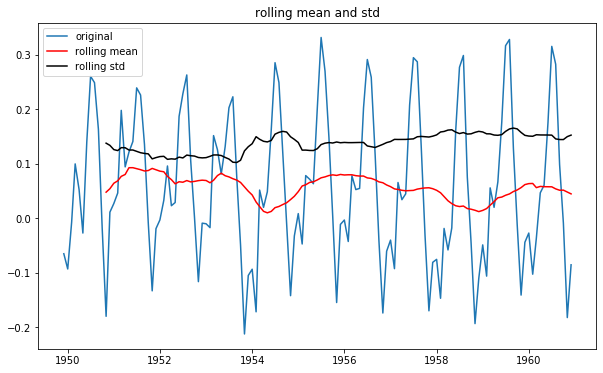

Test statistic                 -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of observation Used    119.000000
Critical value (1%)            -3.486535
Critical value (5%)            -2.886151
Critical value (10%)           -2.579896
dtype: float64


In [70]:
test_stationary(datasetLogScaleMinusMovingAverage)

### since there is no trend now and also it is almost regular, therefore now the dataset is stationary

### also, p value is very less now and also, critical value and p-value is almost equal

### further we have calculated weighted average of time series because we need to see the trend between this timeseries

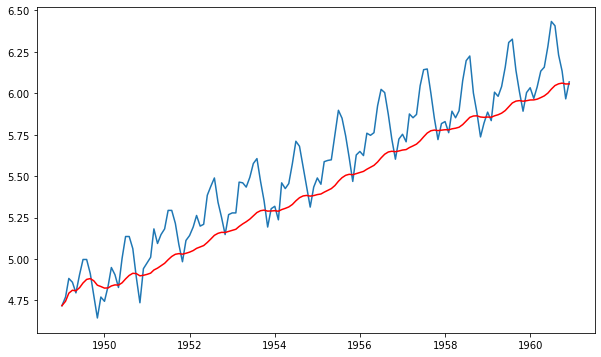

In [71]:
exponentialdecayweightedaverage=indexedDataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialdecayweightedaverage,color="red")

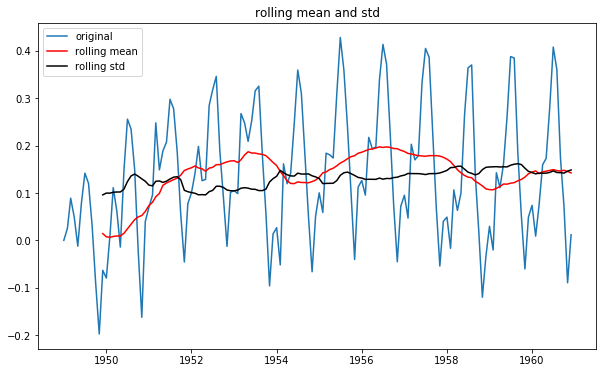

Test statistic                 -3.601262
p-value                         0.005737
#Lags Used                     13.000000
Number of observation Used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [73]:
datasetlogscaleminusmovingexponentialdecayaverage=indexedDataset_logscale-exponentialdecayweightedaverage
test_stationary(datasetlogscaleminusmovingexponentialdecayaverage)

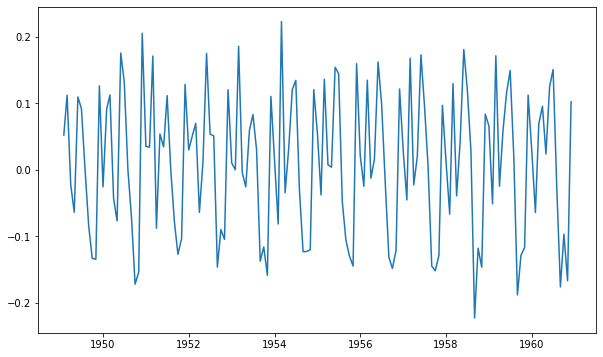

In [74]:
datasetlogdiffshifting=indexedDataset_logscale-indexedDataset_logscale.shift()
plt.plot(datasetlogdiffshifting)

#shift basically differentiated the tme series once

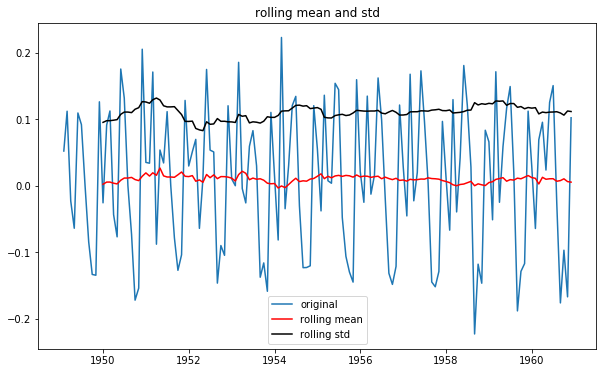

Test statistic                 -2.717131
p-value                         0.071121
#Lags Used                     14.000000
Number of observation Used    128.000000
Critical value (1%)            -3.482501
Critical value (5%)            -2.884398
Critical value (10%)           -2.578960
dtype: float64


In [75]:
datasetlogdiffshifting.dropna(inplace=True)
test_stationary(datasetlogdiffshifting)

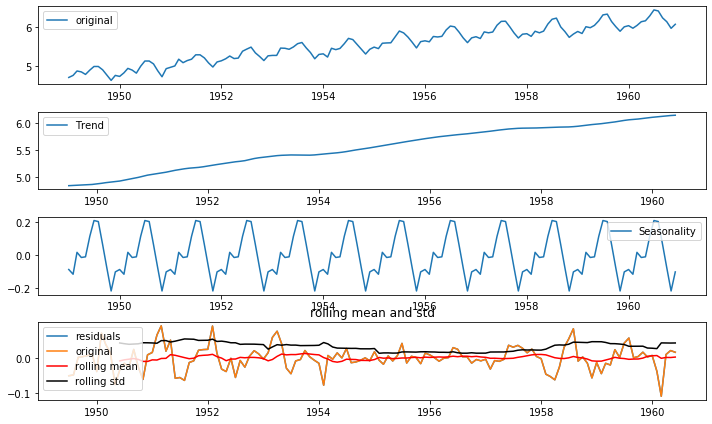

Test statistic               -6.332387e+00
p-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of observation Used    1.220000e+02
Critical value (1%)          -3.485122e+00
Critical value (5%)          -2.885538e+00
Critical value (10%)         -2.579569e+00
dtype: float64


In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logscale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale,label="original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend,label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal,label="Seasonality")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual,label="residuals")
plt.legend(loc="best")
plt.tight_layout()


decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationary(decomposedlogdata)

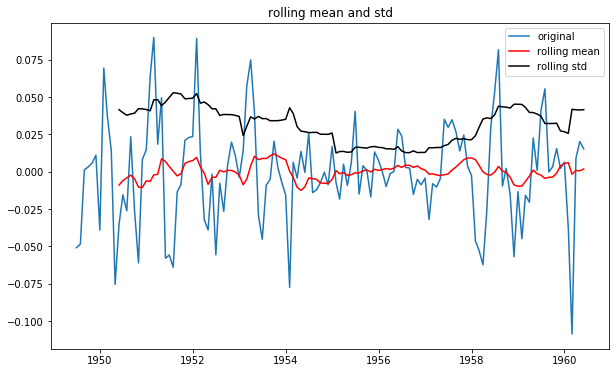

Test statistic               -6.332387e+00
p-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of observation Used    1.220000e+02
Critical value (1%)          -3.485122e+00
Critical value (5%)          -2.885538e+00
Critical value (10%)         -2.579569e+00
dtype: float64


In [78]:
# checking whether the noise / residual is stationary or not

decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationary(decomposedlogdata)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


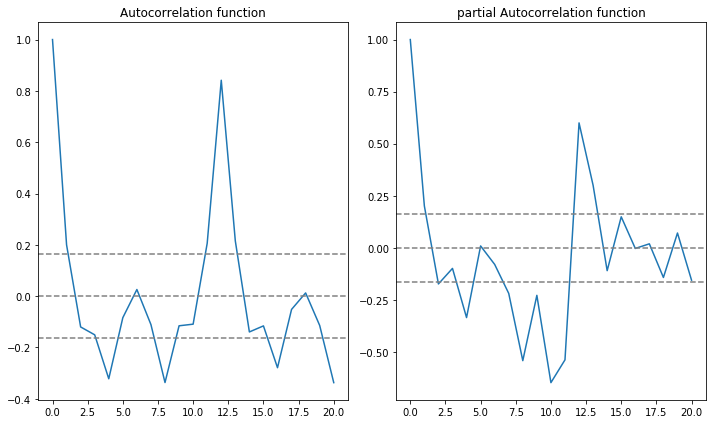

In [80]:
# ACF and PACF plots :
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(datasetlogdiffshifting,nlags=20)
lag_pacf=pacf(datasetlogdiffshifting,nlags=20,method="ols")


# Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle="--",color="gray")
plt.title("Autocorrelation function")


# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle="--",color="gray")
plt.title("partial Autocorrelation function")
plt.tight_layout()






 ## from ACF graph, the value of P is in x axis where the graph touches 0 for the first time in y axis. Same for value of Q in the PACF graph
 
 ## now we will put these values in the Arima model

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


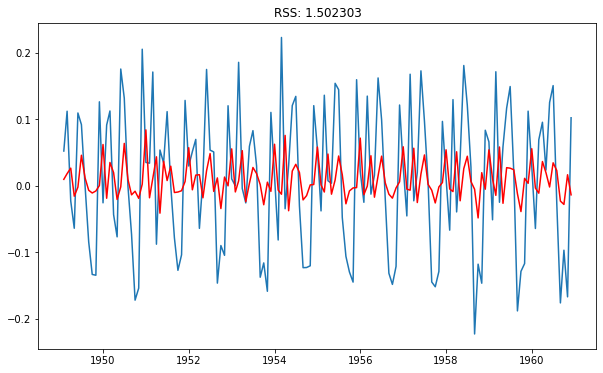

In [87]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model=ARIMA(indexedDataset_logscale,order=(2,1,0))
# order here is (p,d,q) values obtained from above

results_AR=model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_AR.fittedvalues,color="red")
plt.title("RSS: %4F"%sum((results_AR.fittedvalues-datasetlogdiffshifting["#Passengers"])**2))
#RSS= residual sum of squares
# the greater the RSS the bad it is, here 1.029 is a good value

print("Plotting AR model")

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting MA model


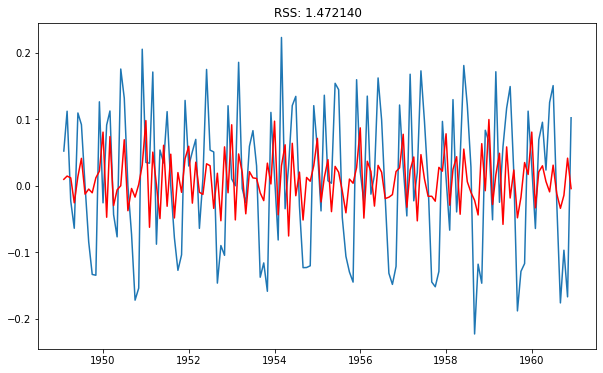

In [88]:
#MA model
model=ARIMA(indexedDataset_logscale,order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_MA.fittedvalues,color="red")
plt.title("RSS: %4F"%sum((results_MA.fittedvalues-datasetlogdiffshifting["#Passengers"])**2))
print("plotting MA model")

## combining AR and MA

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.029152')

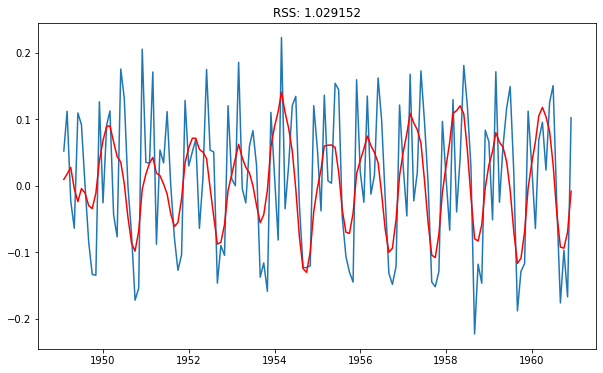

In [86]:
model=ARIMA(indexedDataset_logscale,order=(2,1,2))
results_Arima=model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_Arima.fittedvalues,color="red")
plt.title("RSS: %4F"%sum((results_Arima.fittedvalues-datasetlogdiffshifting["#Passengers"])**2))


In [89]:
predictions_Arima_diff=pd.Series(results_Arima.fittedvalues,copy=True)
print(predictions_Arima_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [90]:
#Convert to cumulative sum
predictions_Arima_diff_cumsum=predictions_Arima_diff.cumsum()
print(predictions_Arima_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [91]:
predictions_Arima_log=pd.Series(indexedDataset_logscale["#Passengers"].ix[0],index=indexedDataset_logscale.index)
predictions_Arima_log=predictions_Arima_log.add(predictions_Arima_diff_cumsum,fill_value=0)
predictions_Arima_log.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

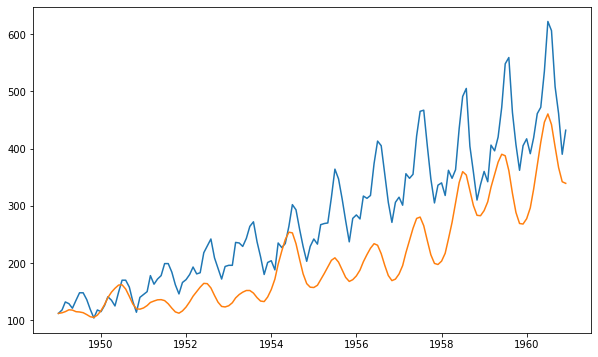

In [92]:
predictions_Arima=np.exp(predictions_Arima_log)
plt.plot(indexedDataset)
plt.plot(predictions_Arima)

In [93]:
indexedDataset_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [94]:
x=results_Arima.forecast(steps=120)

In [96]:
x[1]

array([0.08384711, 0.10749462, 0.11568695, 0.11702775, 0.11703497,
       0.11744018, 0.1176225 , 0.11778714, 0.12024163, 0.12736043,
       0.1387096 , 0.15118793, 0.16157814, 0.16834395, 0.17177329,
       0.17311982, 0.17358732, 0.17385459, 0.17430217, 0.17543331,
       0.17788146, 0.18195721, 0.18726217, 0.19283393, 0.19769245,
       0.20130639, 0.20369055, 0.20519832, 0.20625268, 0.20720998,
       0.2083697 , 0.21000325, 0.21229743, 0.21524478, 0.21860179,
       0.22198256, 0.22503064, 0.22755294, 0.22954806, 0.23114797,
       0.23253824, 0.23390533, 0.23541309, 0.2371831 , 0.23926536,
       0.24161536, 0.2441037 , 0.24656356, 0.24885255, 0.25089628,
       0.25269732, 0.25431626, 0.2558431 , 0.25737226, 0.25898388,
       0.26072848, 0.26261546, 0.26461087, 0.26664896, 0.26865479,
       0.27056846, 0.27236094, 0.27403699, 0.27562771, 0.27717827,
       0.27873524, 0.28033588, 0.28200015, 0.28372679, 0.28549507,
       0.28727207, 0.28902342, 0.29072334, 0.2923608 , 0.29394

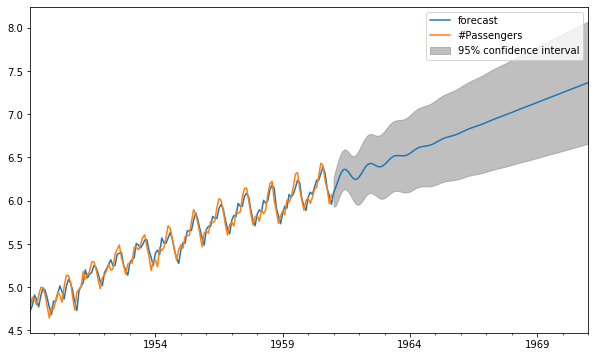

In [100]:
results_Arima.plot_predict(1,264)
x=results_Arima.forecast(steps=120)